In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py

import numpy as np
import pandas as pd

import glob

In [2]:
metrics = ['rmse', 'ssim', 'avg_abs_error','median_error_max_true','relative_norm']
metrics_names = ['RMSE [$N/m^2$]', 'SSIM [-]', 'Mean Abs\nError [$N/m^2$]','Median Error/\nMax True [-]','Relative Norm [-]']
number_of_metrics = len(metrics)

In [3]:
events_train = ['Event0001','Event0002','Event0004','Event0006','Event0007','Event0008','Event0010','Event0011']
events_test = ['Event0000','Event0003','Event0005','Event0009']

### For multiple models

Unique Models : ['unet']
models_output\Event0000\unet_PINN_RES_E500.csv
models_output\Event0001\unet_PINN_RES_E500.csv
models_output\Event0002\unet_PINN_RES_E500.csv
models_output\Event0003\unet_PINN_RES_E500.csv
models_output\Event0004\unet_PINN_RES_E500.csv
models_output\Event0005\unet_PINN_RES_E500.csv
models_output\Event0006\unet_PINN_RES_E500.csv
models_output\Event0007\unet_PINN_RES_E500.csv
models_output\Event0008\unet_PINN_RES_E500.csv
models_output\Event0009\unet_PINN_RES_E500.csv
models_output\Event0010\unet_PINN_RES_E500.csv
models_output\Event0011\unet_PINN_RES_E500.csv
models_output\Event0000\unet_PINN_RES_E500.csv
models_output\Event0001\unet_PINN_RES_E500.csv
models_output\Event0002\unet_PINN_RES_E500.csv
models_output\Event0003\unet_PINN_RES_E500.csv
models_output\Event0004\unet_PINN_RES_E500.csv
models_output\Event0005\unet_PINN_RES_E500.csv
models_output\Event0006\unet_PINN_RES_E500.csv
models_output\Event0007\unet_PINN_RES_E500.csv
models_output\Event0008\unet_PINN_R

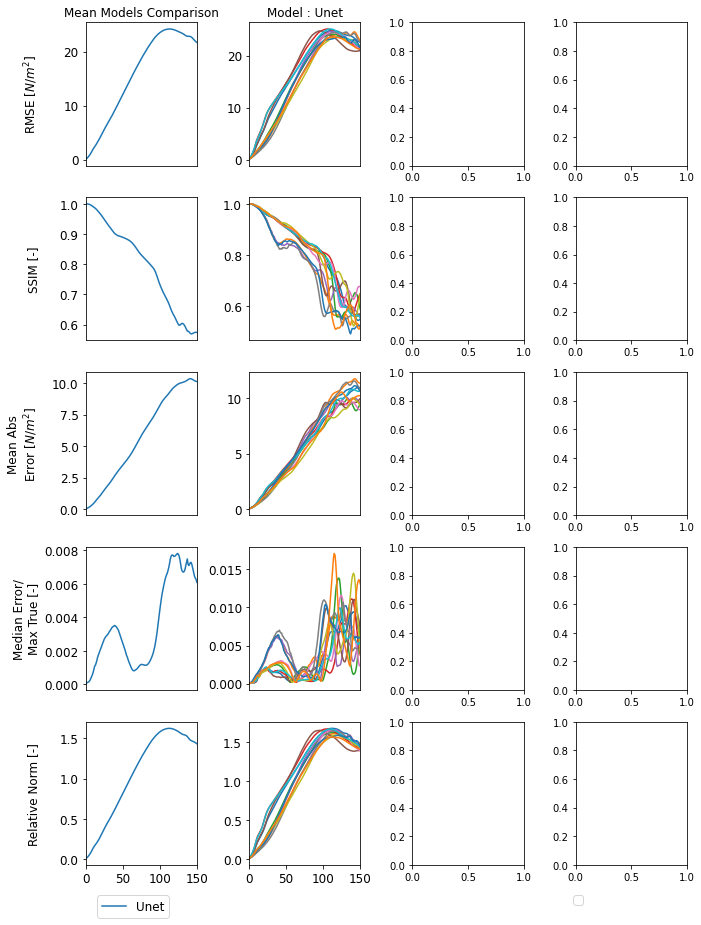

In [4]:
unique_models = []
for path in glob.glob(f'models_output/*/*.csv'):
    unique_models.append(path.split('\\')[2].split('_')[0])

list_unique_models = np.unique(np.array(unique_models))
print('Unique Models :',list_unique_models)

fig, axs = plt.subplots(number_of_metrics,4,figsize=((len(list_unique_models)+1)*5,number_of_metrics*2.5),squeeze=False)

for row, metric in enumerate(metrics):
    for col, model in enumerate(list_unique_models):
        df_norm = pd.DataFrame()

        for path in glob.glob(f'models_output/*/{model}*.csv'):

            print(path)

            df = pd.read_csv(path,index_col=0)
            df_norm[path.split("\\")[1].split('.')[0]] = df[metric]

        axs[row,col+1].plot(df_norm)
        axs[row,col+1].tick_params(labelsize=12)
        axs[row,col+1].set_xlim(0,150)
        #axs[row,col+1].legend(df_norm.columns)

        axs[row,0].plot(df_norm.mean(axis=1),label=model)
        axs[row,0].tick_params(labelsize=12)
        axs[row,0].set_xlim(0,150)
        #axs[row,0].legend()

# Set LabelMetric
for row, metric in enumerate(metrics_names):
   axs[row,0].set_ylabel(metric, fontsize=12)

# Remove x-ticks
for row in range(len(metrics)-1):
    for column in range(len(list_unique_models)+1):
        axs[row,column].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Set ModelName
for col, model_name in enumerate(list_unique_models):
    axs[0,col+1].set_title(f"Model : {model_name.capitalize()}")

# Set TitleName
axs[0,0].set_title('Mean Models Comparison')

fig.align_ylabels()
plt.tight_layout()

# Set Legend - Left
axs[-1,0].legend(labels=[model.capitalize() for model in list_unique_models], bbox_to_anchor=(0.8, -0.17),ncol=2,fontsize=12)

# Set Legend - Right
axs[-1,-1].legend(labels=['AR_PINN_MSE','MSE','MSE and GDL','MSE, GDL and MAE','PINN MSE','PINN RES'], bbox_to_anchor=(0.12, -0.17),ncol=3,fontsize=12)

#plt.savefig('test.png',dpi=300,bbox_inches='tight')

### For UNET model only

In [5]:
metrics = ['rmse', 'ssim', 'avg_abs_error','median_error_max_true','relative_norm']
metrics_names = ['RMSE [$N/m^2$]', 'SSIM [-]', 'Mean Abs\nError [$N/m^2$]','Median Error/\nMax True [-]','Relative Norm [-]']
number_of_metrics = len(metrics)

Event0001
Event0002
Event0004
Event0006
Event0007
Event0008
Event0010
Event0011
Event0000
Event0003
Event0005
Event0009
Event0001
Event0002
Event0004
Event0006
Event0007
Event0008
Event0010
Event0011
Event0000
Event0003
Event0005
Event0009
Event0001
Event0002
Event0004
Event0006
Event0007
Event0008
Event0010
Event0011
Event0000
Event0003
Event0005
Event0009
Event0001
Event0002
Event0004
Event0006
Event0007
Event0008
Event0010
Event0011
Event0000
Event0003
Event0005
Event0009


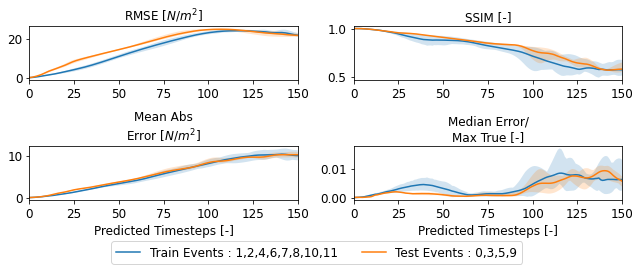

In [6]:
unique_models = []
for path in glob.glob(f'models_output/*/*.csv'):
    unique_models.append(path.split('\\')[2].split('_')[0])

list_unique_models = np.unique(np.array(unique_models))


fig, axs = plt.subplots(2,2,figsize=(9,3.5))
axs = axs.ravel()

for (i, ax), metric in zip(enumerate(axs),metrics):
    for events in [events_train,events_test]:
        df_norm = pd.DataFrame()
        for event in events:
            for path in glob.glob(f'models_output/{event}/{list_unique_models[0]}*.csv'): 
                print(path.split('\\')[0].split('/')[1])

                df = pd.read_csv(path,index_col=0)
                df_norm[path.split('.')[0]] = df[metric]

        ax.plot(df_norm.mean(axis=1))
        ax.fill_between(df_norm.index,df_norm.min(axis=1),df_norm.max(axis=1),alpha=0.2)
        ax.tick_params(labelsize=12)
        if i >1:
            ax.set_xlabel('Predicted Timesteps [-]',fontsize=12)
        ax.set_xlim(0,150)

    # Set TitleName
    ax.set_title(metrics_names[i])
plt.tight_layout()

plt.legend(labels=['Train Events : 1,2,4,6,7,8,10,11','Test Events : 0,3,5,9'],bbox_to_anchor=(0.65,-0.65),ncol=2,fontsize=12)

#plt.savefig('edges_crack_2_metrics.pdf',dpi=300,bbox_inches='tight')

In [7]:
df_CSV = pd.DataFrame()
for metric in metrics:
    for events, mode in zip([events_train,events_test],['Train','Test']):
        df_norm = pd.DataFrame()
        for event in events:
            for path in glob.glob(f'models_output/{event}/{list_unique_models[0]}*.csv'): 

                #print(path.split('\\')[0].split('/')[1])

                df = pd.read_csv(path,index_col=0)
                df_norm[path.split('.')[0]] = df[metric]

        df_CSV.loc[metric,mode] = np.format_float_scientific(df_norm.mean(axis=1).mean(),precision=2)

In [8]:
df_CSV

,Train,Test
rmse,1.51e+01,1.71e+01
ssim,7.89e-01,8.22e-01
avg_abs_error,5.62e+00,5.77e+00
median_error_max_true,3.82e-03,2.99e-03
relative_norm,1.01e+00,1.14e+00
